# I. Business Understanding


# II. Data Understanding

In [1]:
# import the dependencies

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier


import pandas as pd
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


In [6]:
# load the data

data = pd.read_csv('DATA\draft1.csv')

data.head(10)


FileNotFoundError: [Errno 2] No such file or directory: 'DATA\\draft1.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cost         9971 non-null   object
 1   Title        9971 non-null   object
 2   Description  9971 non-null   object
 3   Location     9971 non-null   object
 4   Bedrooms     9141 non-null   object
 5   Bathrooms    9140 non-null   object
 6   Furnished    9140 non-null   object
 7   Space        8888 non-null   object
dtypes: object(8)
memory usage: 623.3+ KB


In [ ]:
data.columns

Index(['Cost', 'Title', 'Description', 'Location', 'Bedrooms', 'Bathrooms',
       'Furnished', 'Space'],
      dtype='object')

In [ ]:
data.describe().T

,count,unique,top,freq
Cost,9971,566,"KSh 7,500,000",285
Title,9971,5524,2bdrm Apartment in Kilimani for sale,132
Description,9971,8028,BUNGALOW HOUSE ON SALE ALONG THIKA RD RUIRU KI...,6
Location,9971,222,"Nairobi, Kilimani",971
Bedrooms,9141,14,3 bedrooms,3128
Bathrooms,9140,13,2 bathrooms,2373
Furnished,9140,3,Unfurnished,7699
Space,8888,610,100sqm,394


In [ ]:
data.shape

(9971, 8)

In [ ]:
data.sample(10)

,Cost,Title,Description,Location,Bedrooms,Bathrooms,Furnished,Space
6291,"KSh 42,000,000",3bdrm Block of Flats in Mtwapa for Sale,For sale uncomplete block of 12 apartments mtw...,"Kilifi, Mtwapa",1 bedroom,1 bathroom,Unfurnished,30sqm
7010,"KSh 2,500,000","4bdrm House in Kazandani, Bamburi for Sale",Introducing a newly built modern swahili house...,"Mombasa, Bamburi",1 bedroom,1 bathroom,Semi-Furnished,4700sqm
5706,"KSh 120,000,000",Furnished 5bdrm Maisonette in Nyali Beach for ...,"Well build house on 6800sqf,the compound is 0....","Mombasa, Nyali",3 bedrooms,2 bathrooms,Unfurnished,20sqm
7903,"KSh 38,000,000",Furnished 1bdrm Block of Flats in Githurai for...,Fairly used block of flats consisting of one b...,"Nairobi, Githurai",3 bedrooms,2 bathrooms,Unfurnished,460sqm
7365,"KSh 3,700,000","2bdrm Bungalow in Kayole Maryland, Naivasha Ea...",50x100 plot in naivasha kayole maryland with r...,"Nakuru, Naivasha",5 bedrooms,2 bathrooms,Unfurnished,800sqm
5814,"KSh 30,000,000","4bdrm Maisonette in Kiamumbi, Kahawa West for ...",4 bedroom maisonette at kiamumbi estate 1.5 ki...,"Nairobi, Kahawa West",4 bedrooms,4 bathrooms,Unfurnished,250sqm
5056,"KSh 21,000,000",5bdrm House in Ruiru for Sale,This estate located in the plains of Kiambu Co...,"Kiambu, Ruiru",2 bedrooms,1 bathroom,Unfurnished,2000sqm
6627,"KSh 7,850,000","3bdrm Bungalow in Savana Gardens, Joska for sale","3 bedroom bungalow Master En - suite ,seated o...","Nairobi, Kamulu",5 bedrooms,5 bathrooms,Unfurnished,3200sqm
5773,"KSh 4,800,000",1bdrm Apartment in Kilimani for sale,"Most affordable 1 Bedroom near Yaya Centre, id...","Nairobi, Kilimani",10 bedrooms,5 bathrooms,Unfurnished,2023sqm
8739,"KSh 4,500,000","2bdrm Bungalow in Balanites, Githunguri Area f...",This house is designed for mansionette but act...,"Nairobi, Utawala",1 bedroom,1 bathroom,Unfurnished,65sqm


In [ ]:
data['Furnished'].value_counts()

Unfurnished       7699
Semi-Furnished     766
Furnished          675
Name: Furnished, dtype: int64

# III. Data Preparation

## Preprocessing

In [ ]:
data = pd.read_csv('draft1.csv')

data.head(10)

,Cost,Title,Description,Location,Bedrooms,Bathrooms,Furnished,Space
0,"KSh 7,800,000",2bdrm Apartment in Kileleshwa for sale,"Newly built two bedroom apartment for sale, Lo...","Nairobi, Kileleshwa",2 bedrooms,2 bathrooms,Unfurnished,98sqm
1,"KSh 12,000,000",2bdrm Apartment in Valley Arcade for sale,FEATURES AND AMENITIES\n● Fully equipped gym\n...,"Nairobi, Lavington",2 bedrooms,2 bathrooms,Unfurnished,133sqm
2,"KSh 15,200,000","3bdrm Apartment in Urban Oasis, Maziwa for sale",You will instantly love being part of this lux...,"Nairobi, Lavington",3 bedrooms,3 bathrooms,Unfurnished,140sqm
3,"KSh 6,000,000",2bdrm Apartment in Mtwapa Gardens for sale,Spacious Two bedroom for sale,"Kilifi, Mtwapa",2 bedrooms,1 bathroom,Unfurnished,90sqm
4,"KSh 7,800,000","3bdrm Bungalow in Matangi, Ruiru for sale",Residential... \nThis is a 3 bedroom all ensui...,"Kiambu, Ruiru",3 bedrooms,4 bathrooms,Unfurnished,2400sqm
5,"KSh 4,700,000","3bdrm Bungalow in Witeithie, Witethie for sale",Residential... \nThis is a 3 bedroom master en...,"Kiambu, Juja",3 bedrooms,3 bathrooms,Unfurnished,3200sqm
6,"KSh 10,000,000",2bdrm Apartment in Kenyatta Rd for Sale,This is a mini flat located in Kenyatta rd(mui...,"Kiambu, Juja",2 bedrooms,2 bathrooms,Unfurnished,3200sqm
7,"KSh 8,500,000","Mini Flat in Matangi, Kimbo for sale","OCCUPIED RENTAL BUILDING FOR SALE IN KIMBO,THI...","Kiambu, Ruiru",1 bedroom,1 bathroom,Unfurnished,2400sqm
8,"KSh 28,000,000","4bdrm Maisonette in Mugutha, Ruiru for sale",Residential... \nThis exquisite 4 bedroom with...,"Kiambu, Ruiru",4 bedrooms,5 bathrooms,Unfurnished,5000sqm
9,"KSh 8,000,000","3bdrm Bungalow in Mugutha, Ruiru for sale",Residential... \nThis 3 bedroom all ensuite bu...,"Kiambu, Ruiru",3 bedrooms,4 bathrooms,Unfurnished,3200sqm


In [ ]:
def extract_neighborhood(df):
    df['Neighborhood'] = df['Title'].apply(lambda x: x.split(' in ')[-1].split(' for')[0].strip())
    return df[['Neighborhood']]

def split_location_column(df):
    df[['County', 'Location']] = df['Location'].str.split(', ', n=1, expand=True)
    return df.drop('Location', axis=1)

def process_bedrooms(df):
    df['Bedrooms'] = df['Bedrooms'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)
    return df[['Bedrooms']]

def process_bathrooms(df):
    df['Bathrooms'] = df['Bathrooms'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)
    return df[['Bathrooms']]

def process_space(df):
    df['Space'] = df['Space'].apply(lambda x: x.replace('sqm', '').strip() if isinstance(x, str) else x)
    return df[['Space']]

def remove_ksh(df):
    df['Cost'] = df['Cost'].apply(lambda x: x.replace('KSh', '').replace(',', '').strip() if isinstance(x, str) else x)
    return df[['Cost']]

def process_title(df):
    keywords = ['Apartment', 'Villa', 'Bungalow', 'Maisonette', 'House', 'Mansion', 'flat']
    df['Type'] = df['Title'].apply(lambda title: next((word for word in keywords if word.lower() in title.lower()), np.nan))
    return df[['Type']]

def process_description(df):
    keywords = ['luxury', 'executive', 'magnificent', 
                'modern', 'ensuite', 'opulent', 'newly', 
                'Spacious', 'Residential', 'equipped',
                ]
    df['Quality'] = df['Description'].apply(lambda desc: 'good' if any(keyword in desc.lower() for keyword in keywords) else 'moderate')
    return df[['Quality']]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
         ('split_title', FunctionTransformer(extract_neighborhood, validate=False), ['Title']),
        ('county_location', FunctionTransformer(split_location_column, validate=False), ['Location']),
        ('process_bedrooms', FunctionTransformer(process_bedrooms, validate=False), ['Bedrooms']),
        ('process_bathrooms', FunctionTransformer(process_bathrooms, validate=False), ['Bathrooms']),
        ('process_space', FunctionTransformer(process_space, validate=False), ['Space']),
        ('process_title', FunctionTransformer(process_title, validate=False), ['Title']),
        ('remove_ksh', FunctionTransformer(remove_ksh, validate=False), ['Cost']),
        ('process_description', FunctionTransformer(process_description, validate=False), ['Description']),
    ],
    remainder='passthrough'  # Include other columns as-is
)

In [ ]:

preprocessed_data = preprocessor.fit_transform(data)
preprocessed_data = pd.DataFrame(preprocessed_data)
preprocessed_data.columns = ['Neighborhood', 'County', 'Bedroom', 'Bathroom', 'Size', 'Type', 'Price', 'Quality', 'Furnished']
preprocessed_data.head(10)

,Neighborhood,County,Bedroom,Bathroom,Size,Type,Price,Quality,Furnished
0,Kileleshwa,Nairobi,2,2,98,Apartment,7800000,good,Unfurnished
1,Valley Arcade,Nairobi,2,2,133,Apartment,12000000,moderate,Unfurnished
2,"Urban Oasis, Maziwa",Nairobi,3,3,140,Apartment,15200000,moderate,Unfurnished
3,Mtwapa Gardens,Kilifi,2,1,90,Apartment,6000000,moderate,Unfurnished
4,"Matangi, Ruiru",Kiambu,3,4,2400,Bungalow,7800000,good,Unfurnished
5,"Witeithie, Witethie",Kiambu,3,3,3200,Bungalow,4700000,good,Unfurnished
6,Kenyatta Rd,Kiambu,2,2,3200,Apartment,10000000,moderate,Unfurnished
7,"Matangi, Kimbo",Kiambu,1,1,2400,flat,8500000,moderate,Unfurnished
8,"Mugutha, Ruiru",Kiambu,4,5,5000,Maisonette,28000000,moderate,Unfurnished
9,"Mugutha, Ruiru",Kiambu,3,4,3200,Bungalow,8000000,good,Unfurnished


## Feature Engineering and Selection

In [ ]:
encoding_columns = ['Furnished', 'Type', 'Quality' ]
ohe_columns = ['Neighborhood', 'County']


# Define encoding function
def encode_categorical(df):
    le = LabelEncoder()
    df['Furnished'] = le.fit_transform(df['Furnished'].astype(str))
    df['Type'] = le.fit_transform(df['Type'].astype(str))
    df['Quality'] = le.fit_transform(df['Quality'].astype(str))
    return df

# Define one-hot encoding function
def one_hot_encode(df):
    df_encoded = pd.get_dummies(df, columns=ohe_columns, prefix=['Neighborhood', 'County'], prefix_sep='_')
    df = df.drop(ohe_columns, axis=1)
    return pd.concat([df, df_encoded], axis=1)



In [ ]:
Feature_Engineering = ColumnTransformer(
    transformers=[
        ('encode_categorical', FunctionTransformer(encode_categorical), encoding_columns),
        ('one_hot_encode', FunctionTransformer(one_hot_encode), ohe_columns)
    ],
    remainder='passthrough'
)

In [ ]:
Engineered_data = pd.DataFrame(Feature_Engineering.fit_transform(preprocessed_data))



In [ ]:
Engineered_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,98,7800000
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,133,12000000
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,140,15200000
3,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,90,6000000
4,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,4,2400,7800000
5,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,3200,4700000
6,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,3200,10000000
7,2,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2400,8500000
8,2,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,5,5000,28000000
9,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,4,3200,8000000


In [ ]:
import seaborn as sns

### Feature selection 

In [ ]:
def select_k_best_anova(X, y, k=30):
    selector = SelectKBest(f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    return X_new

In [ ]:
features = Engineered_data.iloc[:, :-2]
target = Engineered_data.iloc[:, -1:]

Feature_selection = ColumnTransformer(
    transformers=[
        ('anova', FunctionTransformer(select_k_best_anova, validate=False), features )
    ],
    remainder='passthrough')

In [ ]:
target.head(10)

,3573
0,7800000
1,12000000
2,15200000
3,6000000
4,7800000
5,4700000
6,10000000
7,8500000
8,28000000
9,8000000


In [ ]:
selected_data = pd.DataFrame(Feature_selection.fit_transform(Engineered_data))

selected_data.head(10)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18704\2446790283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Engineered_data['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

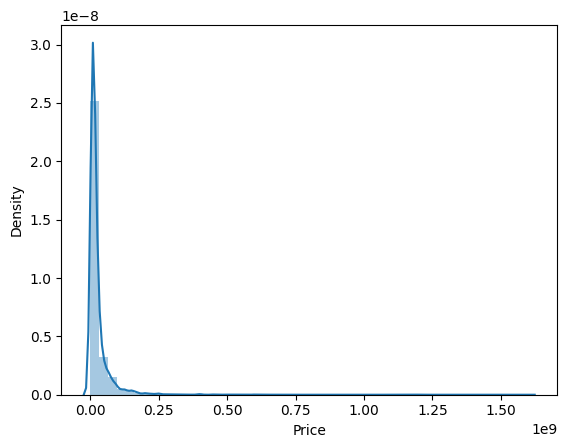

In [ ]:
sns.distplot(Engineered_data['Price'])

In [ ]:
sns.heatmap(Engineered_data.corr(), annot=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18704\251821522.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Engineered_data.corr(), annot=True)


ValueError: zero-size array to reduction operation fmin which has no identity

In [ ]:
transformed_df['Furnished'].value_counts()

0    3678
1    1805
3    1787
2    1075
5     550
4     451
6     361
7     264
Name: Furnished, dtype: int64

In [ ]:
transformed_df.nunique()

Quality            2
Type               4
Furnished          8
Neighborhood    3533
County            34
Bedroom           14
Bathroom          13
Size             610
Price            566
dtype: int64

In [ ]:
transformed_df['Neighborhood'].value_counts()

Kileleshwa                   590
Kilimani                     548
Nyali                        301
Lavington                    266
Kitengela                    235
                            ... 
Gitothua                       1
Wingsdrive Estate, Kuinet      1
Ruaka Magic                    1
Ngong, Matasia                 1
Garden Estate, Thome           1
Name: Neighborhood, Length: 3533, dtype: int64

In [ ]:
final_transformed_df.head()

,0,1,2,3,4,5,6,7
0,7800000.0,Nairobi,2,2,98,2bdrm Apartment in Kileleshwa for sale,"Newly built two bedroom apartment for sale, Lo...",Unfurnished
1,12000000.0,Nairobi,2,2,133,2bdrm Apartment in Valley Arcade for sale,FEATURES AND AMENITIES\n● Fully equipped gym\n...,Unfurnished
2,15200000.0,Nairobi,3,3,140,"3bdrm Apartment in Urban Oasis, Maziwa for sale",You will instantly love being part of this lux...,Unfurnished
3,6000000.0,Kilifi,2,1,90,2bdrm Apartment in Mtwapa Gardens for sale,Spacious Two bedroom for sale,Unfurnished
4,7800000.0,Kiambu,3,4,2400,"3bdrm Bungalow in Matangi, Ruiru for sale",Residential... \nThis is a 3 bedroom all ensui...,Unfurnished


# IV. Modeling

# V. Evaluation

# VI. Deployment

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Sample DataFrame
# Replace this with your actual DataFrame
data = {
    'Furnished': ['A', 'B', 'C'],
    'Type': ['X', 'Y', 'Z'],
    'Quality': ['Good', 'Moderate', 'Excellent'],
    'Neighborhood': ['N1', 'N2', 'N3'],
    'County': ['C1', 'C2', 'C3'],
    'OtherColumn': [10, 20, 30],
    'Target': [100, 150, 200]
}

df = pd.DataFrame(data)


# Define function to select k best features using ANOVA
def select_k_best_anova(X, y, k=5):
    selector = SelectKBest(f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    return X_new

# Custom transformer to maintain column names
class DataFrameTransformer(FunctionTransformer):
    def __init__(self, func, validate=False):
        super().__init__(func, validate)

    def transform(self, X):
        transformed_data = super().transform(X)
        if isinstance(transformed_data, pd.DataFrame):
            return transformed_data
        else:
            raise ValueError("Transformer function should return a DataFrame.")

# Define columns for encoding
encoding_columns = ['Furnished', 'Type', 'Quality']
ohe_columns = ['Neighborhood', 'County']

# Define combined transformer for ColumnTransformer
combined_transformer = ColumnTransformer(
    transformers=[
        ('encode_categorical', DataFrameTransformer(encode_categorical), encoding_columns),
        ('one_hot_encode', DataFrameTransformer(one_hot_encode), ohe_columns),
        ('anova', FunctionTransformer(select_k_best_anova, validate=False), ['OtherColumn'])
        # Add more transformers as needed for other columns
    ],
    remainder='passthrough'
)

# Define the final pipeline
full_pipeline = Pipeline([
    ('feature_engineering', combined_transformer),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

# Split data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
full_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = full_pipeline.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the transformed DataFrame
print(full_pipeline.named_steps['feature_engineering'].transform(X_train))


TypeError: 'bool' object is not callable